# **20230515**

In [1]:
import pandas as pd
import numpy as np
import sklearn

In [2]:
print(sklearn.__version__)

1.2.2


## **02 붓꽃 품종 예측** => 분류(Classification)
- 품종 3개 : 'setosa', 'versicolor', 'virginica' => 다중분류


In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# 전체 데이터를 학습데이터와 테스트 데이터로 분리
from sklearn.model_selection import train_test_split

#### scikit learn  dataset 특징

In [4]:
iris = load_iris()  # dictionary type
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
# dictionary 에서 데이터 추출

#iris.get('data')
#iris['data']
iris_data = iris.data

In [6]:
# 답(label) 추출

iris_label = iris.target

In [7]:
iris.feature_names,iris_data[0], iris_label[0], iris.target_names[0]

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array([5.1, 3.5, 1.4, 0.2]),
 0,
 'setosa')

In [8]:
iris_df = pd.DataFrame(data=iris_data,columns=iris.feature_names)
iris_df['label'] = iris.target

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
iris_df.shape

(150, 5)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(iris_data          # 데이터
                                                    , iris_label       # 답
                                                    , test_size = 0.2  # test데이터 크기지정%
                                                    ,random_state = 42 # 랜덤값 지정
                                                    )
# return => tuple()
# ( train_data(학습데이터)      => 행렬 => 집합
# , train_lagel(학습데이터 답)      
# , test_data(테스트데이터)  => 한개 = 벡터로 표시 => 명 소문자
# , test_label(테스트데이터 답) 
# )


In [11]:
X_train.shape, X_test.shape # 80:20

((120, 4), (30, 4))

In [12]:
y_train.shape, y_test.shape

((120,), (30,))

### 1. Model Object


In [13]:
dt_clf = DecisionTreeClassifier(random_state=42)

### 2. Model train : 학습

In [14]:
dt_clf.fit(X_train,y_train) # X_train(학습데이터), y_train(학습데이터 답)

DecisionTreeClassifier(random_state=42)


### 3. model Predict : 예측


In [15]:
pred = dt_clf.predict(X_test)   # 테스트 데이터 =>  학습된 모델의 예측값

### 4. Acuracy => Predict value == y_test : 평가

- 성능 평가 지표 : ACC, precicsion, recall, fi score, ROC => AUC, MCC, G-Mean, Kapaa

            -> 결과 좋은 모델 사용

In [16]:
(pred == y_test).sum() / len(pred)  # 정확도
# => 30개 모두 맞음

1.0

In [17]:
from sklearn.metrics import accuracy_score

print('예측 정확도 : {0:.4f}'.format(accuracy_score(y_test,pred)))
# => 분류모델 평가지표

예측 정확도 : 1.0000


---

# **20230516**

## **03 사이킷런의 기반 프레임워크 익히기**

프레임워크(틀) : 

- 학습 => fit()
- 예측 => predict()

### O Estimator 이해 및 지도학습의 fit(), predict() 메서드

Estimator(추정기) = 사이킷런의 알고리즘들

<br>

- 사이킷런은 API(함수) 일관성과 개발 편의성이 좋은 패키지

- 사이킷런의 모든 알고리즘은 학습엔 fit, 예측엔 predict 메서드만 사용

<br>

Estimator 클래스(추상)
: 분류(=Classifier)+ 회귀(=Regressor)

=> 다형성 구현 => 일관성 보장

<br>

 cross_val_score()와 같은 평가 함수, GridSearchCV와 같은 하이퍼 파라미터 튜닝을 지원하는 클래스의 경우 Estimator를 인자(파라미터)로 받음

=> Estimator의 fit(),predict() 호출하여 알고리즘들 평가, 하이퍼 파라미터 튜닝 가능

#### ㅇ 분류 구현 클래스

- DecisionTreeClassifier
- RandomForestClassifier
- GradientBoostingClassifier
- GaussianNB
- SVC(Support Vector Classifier)

#### ㅇ 회귀 구현 클래스

- LinearRegression
- Ridge
- Lasso
- RandomForestRegressor
- GradientBoosingRegressor

(+ **다중공선성** :

 입력변수들 간의 상관관계가 존재하여 회귀 계수의 분산을 크게 하기 때문에, 회귀분석 시 추정 회귀 계수를 믿을 수 없게 되는 문제가 발생되는 것을 말한다.)

 

#### ㅇ 비지도학습의 fit(), transform(), fit_transform()

비지도 학습에는 예측X, 결과 => 차원축소, 군집, 중요피처선택 

- fit() : 입력 데이터의 형태에 맞춰 데이터를 변환하기 위한 사전구조 맞추기(식 만들기)
- transform() : 데이터 변환(차원축소, 군집, 중요피처선택)

- fit_transform() = fit + transform

### O 사이킷런의 주요 모듈

| 분류 | 모듈명 | 설명 |
|------|:------|----:|
| 예제 데이터 | sklearn.datasets |사이킷런 내장 데이터세트-> 작고 깨끗|
| 피처 처리   | sklearn.preprocessing |데이터 전처리에 필요한 다양한 기능 제공|
| `` | sklearn.feature_selection |큰 영향을 미치는 피처를 우선 순위대로 셀렉|
| `` | sklearn.feature_extraction |텍스트/이미지 데이터의 벡터화(숫자화)된 피처 추출|
| 피처 처리 & 차원 축소 | sklearn.decomposition |(의미있게)차원축소와 관련된 알고리즘 지원|
| 데이터분리, 검증 & 파라미터 튜닝| sklearn.model_selection |GridSearch로 최적 파라미터 추출|
| 평가 | sklearn.metrics |다양한 성능 측정 방법 제공|
| ML 알고리즘 | sklearn.ensemble |앙상블 알고리즘 제공|
| `` | sklearn.linear_model |회귀 알고리즘, SGD 알고리즘 제공|
| `` | sklearn.naive_bayes |나이브 베이즈 알고리즘 제공|
| `` | sklearn.neighbors |최근접 이웃 알고리즘 제공|
| `` | sklearn.svm |서포트 벡터 머신 알고리즘 제공|
| `` | sklearn.tree |의사 결정 트리 알고리즘 제공|
| `` | sklearn.cluster |비지도 클러스터링 알고리즘 제공|
| 유틸리티 | sklearn.pipeline | 변환, 머신러닝 알고리즘 학습,예측 함께 묶어 실행할 수 있는 유틸리티 제공(잘안씀)|

### O 내장된 예제 데이터 세트


| API명 | 설명 |
|-------|------|
| datasets.load_boston()        | 회귀용 : 미국 보스턴의 집 피처들과 가격에 대한 데이터 세트|
| datasets.load_breast_cancer() | 분류용 : 위스콘신 유방암 피처들과 악성/음성 레이블 데이터 세트 -> 이진분류|
| datasets.load_diabetes()      | 회귀용 : 당뇨 데이터 세트 -> 걸릴 확률%|
| datasets.load_digits()        | 분류용 : 0-9 숫자의 이미지 픽셀 데이터 세트|
| datasets_load_iris()          | 분류용 : 붓꽃에 대한 피처를 가진 데이터 세트|

## **04 Model Selection 모듈 소개**

### O 학습/테스트 데이터 세트 분리 
#### ㅇ train_test_split()

In [18]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [19]:
iris = load_iris()
dt_clf = DecisionTreeClassifier()

train_data = iris.data
train_label = iris.target
dt_clf.fit(train_data, train_label)

DecisionTreeClassifier()

In [20]:
pred = dt_clf.predict(train_data)
print(accuracy_score(train_label, pred))

1.0


In [21]:
dt_clf = DecisionTreeClassifier()
iris_data = load_iris()

X_train, X_test, y_train,y_test = train_test_split(iris_data.data,
                                                   iris_data.target,
                                                   test_size=0.3,
                                                   random_state=45)

In [22]:
dt_clf.fit(X_train,y_train)
pred = dt_clf.predict(X_test)
accuracy_score(y_test, pred)

0.9555555555555556

### O 교차검증

학습 데이터/ 테스트 데이터 분리하는 방법을 사용해도 과대적합(Overfitting)에 취약할 수 있다.

- 과대적합 : 모델이 **학습데이터에만 과도하게 최적화**되어, **새로운 데이터의 예측 성능이 과도하게 떨어지는** 경우

        -> 방지 방법 있음

        * 교차 검증을 통해 Overfitting 개선


---

# **20230517**

#### ㅇ K 폴드 교차 검증

 : K(정수) 겹 교차 검증


 - 적은 양의 데이터로 많은 양의 데이터로 검증하는 효과 가질 수 있음

 1. 폴드 세트 설정
 2. for 루프에서 반복으로 학습 및 테스트 데이터의 인덱스 추출
 3. 반복적으로 학습과 예측을 수행하고 예측 성능 반환

In [23]:
from sklearn.model_selection import KFold

iris = load_iris()
features = iris.data
label = iris.target

dt_clf = DecisionTreeClassifier(random_state=45)

In [24]:
kfold = KFold(n_splits=5)
cv_accuracy = []    # 총 5(k)개의 accuracy 생성됨

In [25]:
n_iter = 0

for train_index,test_index in kfold.split(features):
    
    # kfold.split()으로 반환된 인덱스를 이용해 학습/검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]

    # 학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)

    # 반복 시마다 정확도 측정
    n_iter += 1
    accuracy = np.round(accuracy_score(y_test,pred), 4) # 4번째 자리수에서 반올림
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]

    print('\n#{0} 교차 검증 정확도:{1}, 학습데이터크기:{2}, 검증데이터크기:{3}'.format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter, test_index))

    cv_accuracy.append(accuracy)

# 평균 정확도
print('\n평균 검증 정확도:',np.mean(cv_accuracy))



#1 교차 검증 정확도:1.0, 학습데이터크기:120, 검증데이터크기:30
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도:1.0, 학습데이터크기:120, 검증데이터크기:30
#2 검증 세트 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도:0.8667, 학습데이터크기:120, 검증데이터크기:30
#3 검증 세트 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도:0.9333, 학습데이터크기:120, 검증데이터크기:30
#4 검증 세트 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도:0.7667, 학습데이터크기:120, 검증데이터크기:30
#5 검증 세트 인덱스:[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

평균 검증 정확도: 0.91334


##### - Stratified K 폴드
: 불균형한(imbalanced) 분포도를 가진 레이블(결정 클래스) 데이터 집합을 위한 K폴드 방식

+) 불균형한 분포도 : 특정 레이블 값이 특이하게 많거나 매우 적어 값의 분포가 한쪽으로 치우치는 것

 불균형한 분포도를 가진 레이블을 K폴드로 랜덤하게 학습 및 테스트 세트의 인덱스를 고르더라도 원래 레이블 값의 비율을 제대로 반영하지 못한다.

(학습/테스트 세트에서도 원본 데이터와 유사한 레이블 값의 분포를 가져야함)

In [26]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df['label'].value_counts()

label
0    50
1    50
2    50
Name: count, dtype: int64

In [27]:
kfold = KFold(n_splits=3)
n_iter=0

for train_index, test_index in kfold.split(iris_df):
    n_iter+=1

    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]

    print('## 교차 검증:{0}'.format(n_iter))
    print('학습 레이블 데이터 분포: \n', label_train.value_counts())
    print('검증 레이블 데이터 분포: \n', label_test.value_counts())


## 교차 검증:1
학습 레이블 데이터 분포: 
 label
1    50
2    50
Name: count, dtype: int64
검증 레이블 데이터 분포: 
 label
0    50
Name: count, dtype: int64
## 교차 검증:2
학습 레이블 데이터 분포: 
 label
0    50
2    50
Name: count, dtype: int64
검증 레이블 데이터 분포: 
 label
1    50
Name: count, dtype: int64
## 교차 검증:3
학습 레이블 데이터 분포: 
 label
0    50
1    50
Name: count, dtype: int64
검증 레이블 데이터 분포: 
 label
2    50
Name: count, dtype: int64


In [28]:
# 불균형 데이터 교차 검증 문제 해결
# => 레이블 단위로 분할 검증

from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
n_iter=0

for train_index, test_index in skf.split(iris_df, iris_df['label']):
    n_iter+=1

    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]

    print('## 교차 검증:{0}'.format(n_iter))
    print('학습 레이블 데이터 분포: \n', label_train.value_counts())
    print('검증 레이블 데이터 분포: \n', label_test.value_counts())

## 교차 검증:1
학습 레이블 데이터 분포: 
 label
2    34
0    33
1    33
Name: count, dtype: int64
검증 레이블 데이터 분포: 
 label
0    17
1    17
2    16
Name: count, dtype: int64
## 교차 검증:2
학습 레이블 데이터 분포: 
 label
1    34
0    33
2    33
Name: count, dtype: int64
검증 레이블 데이터 분포: 
 label
0    17
2    17
1    16
Name: count, dtype: int64
## 교차 검증:3
학습 레이블 데이터 분포: 
 label
0    34
1    33
2    33
Name: count, dtype: int64
검증 레이블 데이터 분포: 
 label
1    17
2    17
0    16
Name: count, dtype: int64


In [29]:
df_clf = DecisionTreeClassifier(random_state=156)

skfold = StratifiedKFold(n_splits=3)
n_iter = 0
cv_accuracy=[]

for train_index,test_index in skfold.split(features,label):
    
    # kfold.split()으로 반환된 인덱스를 이용해 학습/검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]

    # 학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)

    # 반복 시마다 정확도 측정
    n_iter += 1
    accuracy = np.round(accuracy_score(y_test,pred), 4) # 4번째 자리수에서 반올림
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]

    print('\n#{0} 교차 검증 정확도:{1}, 학습데이터크기:{2}, 검증데이터크기:{3}'.format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter, test_index))

    cv_accuracy.append(accuracy)

# 평균 정확도
print('\n평균 검증 정확도:',np.mean(cv_accuracy))


#1 교차 검증 정확도:0.98, 학습데이터크기:100, 검증데이터크기:50
#1 검증 세트 인덱스:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#2 교차 검증 정확도:0.92, 학습데이터크기:100, 검증데이터크기:50
#2 검증 세트 인덱스:[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#3 교차 검증 정확도:1.0, 학습데이터크기:100, 검증데이터크기:50
#3 검증 세트 인덱스:[ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

평균 검증 정확도: 0.9666666666666667


#### ㅇ cross_val_score() -  교차 검증을 보다 간편하게

-> for문 대신 사용

```python
cross_val_score(
    estimator        # DT,...
    , X               # data
    , y=None          # 답 
    , scoring=None    # 평가방법(정확도,...)
    , cv=None         # 3,4,...
    , n_jobs=1        # cpu코어수(전체사용:-1)
    , verbose=0       # 출력결과 표시 방식(상세/결과)
    , fit_params=None # 모델별 튜닝 설정(dict)
)
```

* cross_val_score()는 내부적으로 StratifiedKFold 사용

In [30]:
from sklearn.model_selection import cross_val_score, cross_validate

iris_data = load_iris()     # return dict
dt_clf = DecisionTreeClassifier(random_state=156)

data = iris_data.data
label = iris_data.target

# 성능지표(평가방법) = 정확도, 교차검증세트 3개
scores = cross_val_score(
        dt_clf
        , data
        , label
        , scoring='accuracy'
        , cv = 3
        )

print('교차 검증별 정확도 : ', np.round(scores,4))
print('평균 검증 정확도 : ', np.round(np.mean(scores),4))

교차 검증별 정확도 :  [0.98 0.94 0.98]
평균 검증 정확도 :  0.9667


### O **GridSearchCV** -  교차검증과 최적 하이퍼 파라미터 튜닝을 한 번에

- GridSearch : 최적 하이퍼 파라미터 찾기
- CV : 교차검증

In [31]:
# max_depth, min_samples_split => 과대적합 방지 위한 파라미터
grid_parameters = {'max_depth':[1,2,3]
                   ,'min_samples_split':[2,3]}  # 최소 샘플 데이터의 분리 개수

# => 총 6개의 결과

- GridSearhCV()


```python
GridSearchCV(
    estimator
    , param_grid    # 파라미터
    , scoring       
    , cv            # 겹
    , refit=True    #
)
```

In [32]:
from sklearn.model_selection import GridSearchCV

iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data,iris_data.target
                                                    ,test_size=0.2, random_state=121)
dtree = DecisionTreeClassifier()

In [33]:
parameters = {'max_depth':[2,3,4]       #max_depth는 항상 2 이상이어야함
            ,'min_samples_split':[2,3]}

grid_dtree = GridSearchCV(dtree
                          ,param_grid=parameters
                          ,cv=3
                          ,refit=True)

# 전체 모델의 개수 = parm * cv = 18

In [34]:
grid_dtree.fit(X_train, y_train)

#                                   attribute
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params','mean_test_score','rank_test_score'
           ,'split0_test_score','split1_test_score','split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.950
1,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.950
2,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.950
3,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.950
4,"{'max_depth': 4, 'min_samples_split': 2}",0.950000,5,0.925,1.0,0.925
5,"{'max_depth': 4, 'min_samples_split': 3}",0.950000,5,0.925,1.0,0.925


In [35]:
print('최적 파라미터 : ',grid_dtree.best_params_)
print('최고 정확도 : ', grid_dtree.best_score_)

최적 파라미터 :  {'max_depth': 3, 'min_samples_split': 2}
최고 정확도 :  0.975


In [36]:
# GridSearchCV의 refit으로 이미 학습된 estimator 반환
estimator = grid_dtree.best_estimator_

pred = estimator.predict(X_test)
print(accuracy_score(y_test, pred))

0.9666666666666667


## **05 데이터 전처리**

- NaN 값 처리
- 문자열 -> 숫자형 : 인코딩(벡터화)


### O 데이터 인코딩 : 문자 -> 숫자

- 레이블 인코딩(label encoding) : 카테고리 피처(문자열) -> 숫자형

- 원-핫 인코딩(One Hot encoding): 카테고리 피처(문자열) -> 숫자형


#### ㅇ 레이블 인코딩

숫자형으로 변환하며 카테고리별 가중치가 달라질 수 있다.

-> 선형회귀와 같은 알고리즘에서 문제가 될 수 있음 

In [37]:
from sklearn.preprocessing import LabelEncoder

items=['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

encoder = LabelEncoder()
encoder.fit(items)      # 숫자-문자 매칭
labels = encoder.transform(items) # 실제로 숫자로 변환

print('인코딩 변환값 : ',labels)
print('인코딩 클래스', encoder.classes_)

인코딩 변환값 :  [0 1 4 5 3 3 2 2]
인코딩 클래스 ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


In [38]:
print('디코딩 원본값:',encoder.inverse_transform([4,5,2,0,1,1,3,3]))

디코딩 원본값: ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


레이블 인코딩의 문제점 해결을 위한 인코딩 방식

#### ㅇ 원-핫 인코딩 : 여러개의 속성 중 단 한 개의 속성만 1로 표시

: 컬럼 값의 유형에 따라 새로운 컬럼을 추가해 고유 값에 해당하는 컬럼에만 1을 표시하고 나머지 컬럼에는 0을 표시하는 방식


예시)

학생 데이터

|학생|혈액형|
|----|-----|
|가  |A    |
|나  |B    |
|다  |C    |
|라  |D    |

원-핫 인코딩

|학생|A  |B  |O  |AB |
|----|---|---|---|---|
|가  |1  |0  |0  |0  |
|나  |0  |1  |0  |0  |
|다  |0  |0  |1  |0  |
|라  |0  |0  |0  |1  |

주의사항)

- 입력값으로 2차원 데이터가 필요

- OneHotEncoder로 변환한 값이 희소행렬(Sparse Matrix)이므로 toarry() 메서드를 이용해 밀집행렬(Dense Matrix)로 변환해야함

In [39]:
from sklearn.preprocessing import OneHotEncoder

items=['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

# 1차원 lits -> 2차원 ndarray로 변환
# reshape(-1,1) (자동 추정 배정, 1열)
items = np.array(items).reshape(-1,1)

# 원-핫 인코딩 적용
oh_encoder = OneHotEncoder()
oh_encoder.fit(items)
oh_labels = oh_encoder.transform(items)

# OneHotEncoder로 변환한 결과는 희소행렬(0이많음)이므로 toarray()를 이용해 밀집행렬로 변환
print('원핫 인코딩 데이터')
print(oh_labels.toarray())
print('\n원핫 인코딩 데이터 차원')
print(oh_labels.shape)

원핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]

원핫 인코딩 데이터 차원
(8, 6)


##### - ***get_dummies()***

```python
pd.get_dummies(
    data,
    prefix=None,
    prefix_sep: 'str | Iterable[str] | dict[str, str]' = '_',
    dummy_na: 'bool' = False,
    columns=None,
    sparse: 'bool' = False,
    drop_first: 'bool' = False,
    dtype: 'NpDtype | None' = None,
) -> 'DataFrame
```

In [51]:
df = pd.DataFrame({
    'item':['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']
})

pd.get_dummies(df,dtype='int')



,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


### O 피처 스케일링과 정규화

#### ㅇ 피처 스케일링 
 : 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업

-> 표준화(Standardization) | 정규화(Normalization)

- **표준화** : 데이터의 피처 각각이 평균이 0이고 분산이 1인 가우시안 정규분포를 가진 값으로 변환

= 원래 값에서 피처 x의 평균을 뺀 값을 피처 x의 표준편차로 나눈 값

        == StandardScaler

$$x_i\_new =  \frac {x_i - mean(x)}{stdev(x)}$$

<br>

+) RubstScaler : 평균 대신 중앙값으로 뺌

-> 평균은 이상치에 민감, 이상치가 많은 데이터는 표준화사용x

<br>

- **정규화** : 서로 다른 피처의 크기를 통일하기 위해 크기를 변환

= 원래 값에서 피처 x의 최솟값을 뺀 값을 피처 x의 최대값과 최솟값의 차이로 나눈 값

        == MinMaxScaler


$$x_i\_new =  \frac {x_i - mean(x)}{max(x) - min(x)}$$

<br>

- 사이킷런의 Nomalizer 모듈 <- 선형대수에서의 정규화 개념

$$x_i\_new =  \frac {x_i}{\sqrt {x_i^2 + y_i^2 + z_i^2}}$$

### O StandardScaler(표준화)
: 개별 컬럼을 평균이 0이고 분산이 1인 값으로 변환

: 트리계열 알고리즘 제외한 알고리즘에서 필수
(트리계열은 정규화할 필요x)

In [41]:
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data,columns=iris.feature_names)

print('평균값')         # 평균 상이 == 분포 상이
print(iris_df.mean())
print('\n분산값')       # 분산 : 평균으로부터 떨어져있는 정도
print(iris_df.var())    

평균값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

분산값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [42]:
from sklearn.preprocessing import StandardScaler

# 객체 생성
scaler = StandardScaler()
# 데이터 셑 변환, fit(), transform()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

#transforma()시 스케일 변환된 데이터 세트가 ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)

print('평균값')             # 0에 가까워짐
print(iris_df_scaled.mean())
print('\n분산값')
print(iris_df_scaled.var()) 

평균값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

분산값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


### O MinMaxScaler(정규화)

In [43]:
from sklearn.preprocessing import MinMaxScaler

# 객체 생성
scaler = MinMaxScaler()
# 데이터 셑 변환, fit(), transform()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

#transforma()시 스케일 변환된 데이터 세트가 ndarray로 반환돼 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)

print('최솟값')             # 0에 가까워짐
print(iris_df_scaled.min())
print('\n최댓값')
print(iris_df_scaled.max()) 

최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


### O 학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점

test data fit() 하지 말기



In [44]:
train_array = np.arange(0,11).reshape(-1,1)
test_array = np.arange(0,6).reshape(-1,1)

scaler = MinMaxScaler()

# train_array의 값 최소0, 최대10
scaler.fit(train_array)

# 10-> 1 변환 : 1/10
train_scaled = scaler.transform(train_array)

print('원본 tran_array', np.round(train_array.reshape(-1),2))
print('scaled tran_array', np.round(train_scaled.reshape(-1),2))

원본 tran_array [ 0  1  2  3  4  5  6  7  8  9 10]
scaled tran_array [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [45]:
# test_array 최소0, 최대5
scaler.fit(test_array)

# 5 ->1 변환 :1/5
test_scaled = scaler.transform(test_array)


print('원본 test_array',np.round(test_array.reshape(-1),2))
print('scaled test_array',np.round(test_scaled.reshape(-1),2))

# train, test에서의 같은값 scaled결과 달라짐 => 이렇게 사용x

원본 test_array [0 1 2 3 4 5]
scaled test_array [0.  0.2 0.4 0.6 0.8 1. ]


In [46]:
scaler.fit(train_array)

# 10-> 1 변환 : 1/10
train_scaled = scaler.transform(train_array)

print('원본 tran_array', np.round(train_array.reshape(-1),2))
print('scaled tran_array', np.round(train_scaled.reshape(-1),2))

# test 데이터는 fit() X
test_scaled = scaler.transform(test_array)

print('원본 test_array',np.round(test_array.reshape(-1),2))
print('scaled test_array',np.round(test_scaled.reshape(-1),2))

원본 tran_array [ 0  1  2  3  4  5  6  7  8  9 10]
scaled tran_array [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
원본 test_array [0 1 2 3 4 5]
scaled test_array [0.  0.1 0.2 0.3 0.4 0.5]


요약)

1. 가능하다면 전체 데이터의 스케일링 변환을 적용한 뒤 학습과 테스트 데이터로 분리

2. 위의 방법이 여의치 않다면 테스트 변환 시에는 fit()이나 fit_transform()을 적용하지 않고 학습 데이터로 이미 fit()된 Scaler 객체를 이용, transform()

## **06 사이킷런으로 수행하는 타이타닉 생존자 예측**

In [47]:
titanic_df = pd.read_csv('../data/train.csv')

In [48]:
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [ ]:
import seaborn as sns

<Axes: xlabel='Pclass', ylabel='Survived'>

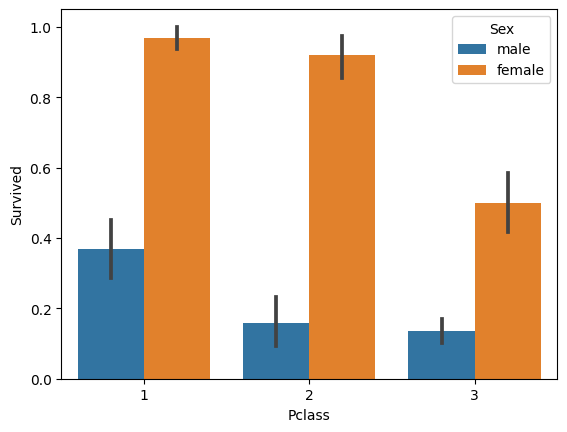

In [ ]:
sns.barplot(x='Pclass',y='Survived',hue='Sex', data=titanic_df)